# Gamma correction and perelement math

Gamma correction is used to skew pixels, value distribution in a non-linear manner. With gamma correction, it's possible to adjust the luminescence of the image to make it easier to see. In this recipe, you will learn how to apply gamma correction to images.

Gamma correction is a non-linear operation that adjusts image pixel intensities. The operation is represented through the power-law relationship between input and output pixel values: $V_out = V_{in}^{r}$. The values with an exponent coefficient higher than 1 make the image darker, while the values less than 1 make the image brighter.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
image_float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] ]  image_float32: float32


<Figure size 432x432 with 0 Axes>

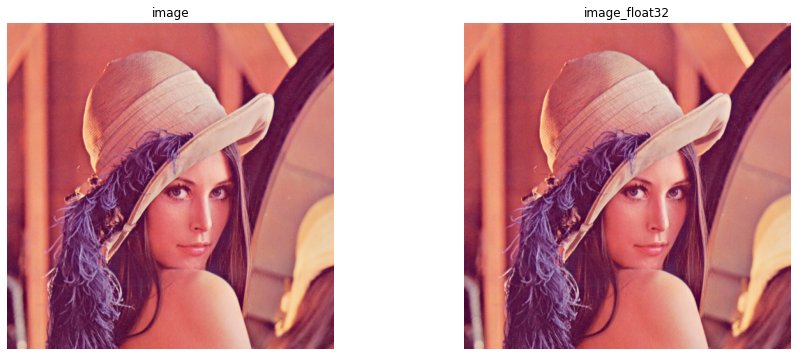

In [2]:
import cv2
#image = cv2.imread('../data/Lena.png', 0).astype(np.float32) / 255

image = cv2.imread('data/Lena.png')
image_float32 = np.copy(image).astype(np.float32) / 255


###################################################
print_image('image', 'image',  image,0,1,0,8)
print_image('image_float32', 'image_float32',  image_float32,0,1,0,8)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]]  
                   ])

cv2.imshow('original', image)
cv2.imshow('image_float32', np.hstack([image_float32]))
cv2.waitKey()
cv2.destroyAllWindows()

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
image_float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] ]  image_float32: float32
corrected_image
  Shape: (512, 512, 3)   Data type: float32
[ [0.70014006 0.73297673 0.94142157] [0.70014006 0.73297673 0.94142157] [0.7221971  0.73297673 0.9351523 ] [0.7084919 0.7302968 0.9351523] [0.6859943  0.73564696 0.94142157] [0.6744642  0.7112541  0.94142157] [0.69451636 0.73564696 0.9455779 ] [0.6973339  0.72490704 0.943502  ] ]  corrected_image: float32


<Figure size 432x432 with 0 Axes>

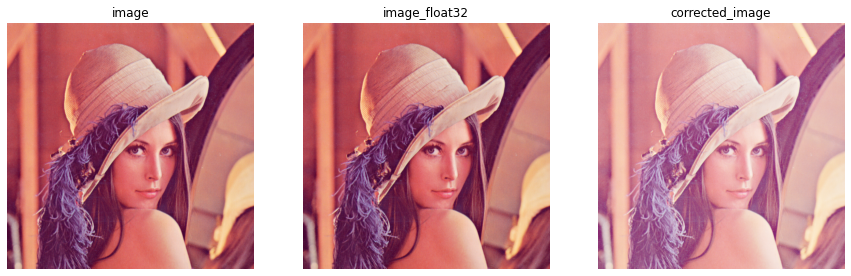

In [3]:
gamma = 0.5
corrected_image = np.power(image_float32, gamma)


#######################################################################
print_image('image', 'image',  image,0,1,0,8)
print_image('image_float32', 'image_float32',  image_float32,0,1,0,8)
print_image('corrected_image','corrected_image', corrected_image,0,1,0,8)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],
                    ["corrected_image",corrected_image[:,:,[2,1,0]]]
                   ])

cv2.imshow('image_float32 -> corrected_image', np.hstack([image_float32, corrected_image]))
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
image_float32_255 = np.copy(image_float32*255)
corrected_image_255 = np.copy(corrected_image*255)

#######################################################################
print_image('image', 'image',  image,0,1,0,8)
print_image('image_float32_255', 'image_float32_255',image_float32_255,0,1,0,8)
print_image('image_float32', 'image_float32',  image_float32,0,1,0,8)

print_image('corrected_image','corrected_image', corrected_image,0,1,0,8)
print_image('corrected_image_255','corrected_image_255', corrected_image_255,0,1,0,8)


cv2.imwrite('image.png', image_float32_255)
cv2.imwrite('corrected_image.png', corrected_image_255)
cv2.waitKey()
cv2.destroyAllWindows()

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
image_float32_255
  Shape: (512, 512, 3)   Data type: float32
[ [125. 137. 226.] [125. 137. 226.] [133. 137. 223.] [128. 136. 223.] [120. 138. 226.] [116. 129. 226.] [123. 138. 228.] [124. 134. 227.] ]  image_float32_255: float32
image_float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] [0.4862745 0.5254902 0.8901961] ]  image_float32: float32
corrected_image
  Shape: (512, 512, 3)   Data type: float32
[ [0.70014006 0.73297673 0.94142157] [0.70014006 0.73297673 0.94142157] [0.7221971  0.73297673 0.9351523 ] [0.7084919 0.7302968 0.9351523] [0.6859943  0.73564696 0.94142

<Figure size 1296x432 with 0 Axes>

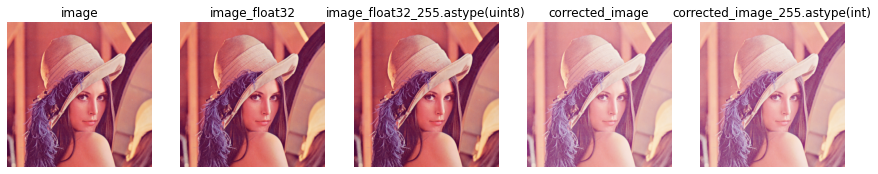

image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
image_float32_255
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image_float32_255: uint8
corrected_image_255
  Shape: (512, 512, 3)   Data type: uint8
[ [178 186 240] [178 186 240] [184 186 238] [180 186 238] [174 187 240] [171 181 240] [177 187 241] ]  corrected_image_255: uint8


In [5]:
plt.figure(figsize=(18,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],
                    ["image_float32_255.astype(uint8)",image_float32_255[:,:,[2,1,0]].astype(np.uint8)],
                    ["corrected_image",corrected_image[:,:,[2,1,0]]],
                    ["corrected_image_255.astype(int)",corrected_image_255[:,:,[2,1,0]].astype(int)]
                   ])
print_image('image', 'image', image,0,1,0,7)
print_image('image_float32_255',  'image_float32_255',  image_float32_255.astype(np.uint8),0,1,0,7)
print_image('corrected_image_255','corrected_image_255',corrected_image_255.astype(np.uint8),0,1,0,7)

#cv2.imshow('image_float32 ->  *255', image_float32_255.astype(np.uint8))
#cv2.imshow('image_float32  ->  *255.astype(int)', np.hstack([image_float32, image_float32_255]))
#cv2.imshow('image_float32  ->  *255.astype(int)',corrected_image_255)
cv2.imshow('image-image_float32 -> corrected_image*255', 
           np.hstack([image, image_float32_255.astype(np.uint8),corrected_image_255.astype(np.uint8)]))
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
!dir
!ls

 Volume in drive D is DATA
 Volume Serial Number is 0648-2872

 Directory of D:\HTML_DOC\Program\opencv\Packt\S02\env

03/24/2020  07:56    <DIR>          .
03/24/2020  07:56    <DIR>          ..
03/24/2020  07:40    <DIR>          .ipynb_checkpoints
03/24/2020  07:56           490,502 corrected_image.png
03/23/2020  23:44    <DIR>          data
03/23/2020  23:47    <DIR>          etc
03/24/2020  07:56           521,129 image.png
03/23/2020  23:44    <DIR>          images
03/23/2020  23:44    <DIR>          Include
03/23/2020  23:44    <DIR>          Lib
03/24/2020  05:13         6,554,112 mat.csv
03/23/2020  23:44                89 pyvenv.cfg
03/20/2019  03:27            43,298 r08_hist.png
03/24/2020  04:08            54,459 S0201 Manipulating matrices creating, filling, accessing elements, ROIs .ipynb
03/24/2020  04:30         1,398,098 S0202 Converting between different data types and scaling values.ipynb
03/24/2020  05:13           736,652 S0203 Non-image data persistence using nu

'ls' is not recognized as an internal or external command,
operable program or batch file.
